In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
data_features = pd.read_csv("./dataset/train/subs_features_train.csv",sep=";")
test_features = pd.read_csv("./dataset/test/subs_features_test.csv",sep=";")
data_features.head()

,SNAP_DATE,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
0,01.08.01,4,3339,80,5,2,1,12.0,1,1489.0,...,1,1,",031696",",076724",",040279",",0133",",083382",",027579",",103896",2.0
1,01.08.01,4,238,75,5,2,1,7.0,1,945.0,...,1,1,",015893",",012981",0,0,",04893",",027579",",103896",3.0
2,01.08.01,4,4669,43,5,2,1,3.0,3,1033.0,...,1,1,",000415",0,0,0,",009397",",027579",",103896",3.0
3,01.08.01,4,2555,54,5,2,1,12.0,1,512.0,...,1,1,",04651",",039486",",000829",0,",196676",",027579",",103896",1.0
4,01.08.01,4,2291,38,5,2,1,7.0,1,1268.0,...,1,1,",005393",",007385",",003884",0,",047297",",027579",",103896",6.0


In [3]:
def to_f(x):
    if issubclass(str,type(x)):
        x = x.replace(',','.')
    return float(x)
to_float = np.vectorize(to_f)

In [4]:
CAT = []
for i in data_features.columns:
    if re.match(r'COM_CAT',i) or re.match(r'REVENUE',i) or re.match(r'ITC',i) or re.match(r'VAS',i) or re.match(r'RENT_CHANNEL',i) or re.match(r'ROAM',i) or re.match(r'COST',i):
        CAT.append(i)

In [5]:
for i in CAT:
    data_features[i] = to_float(data_features[i])

In [6]:
CAT = []
for i in test_features.columns:
    if re.match(r'COM_CAT',i) or re.match(r'REVENUE',i) or re.match(r'ITC',i) or re.match(r'VAS',i) or re.match(r'RENT_CHANNEL',i) or re.match(r'ROAM',i) or re.match(r'COST',i):
        CAT.append(i)

for i in CAT:
    test_features[i] = to_float(test_features[i])

In [7]:
for i in data_features:
    print i, type(data_features[i][0])

SNAP_DATE <type 'str'>
COM_CAT#1 <type 'numpy.float64'>
SK_ID <type 'numpy.int64'>
COM_CAT#2 <type 'numpy.float64'>
COM_CAT#3 <type 'numpy.float64'>
BASE_TYPE <type 'numpy.int64'>
ACT <type 'numpy.int64'>
ARPU_GROUP <type 'numpy.float64'>
COM_CAT#7 <type 'numpy.float64'>
COM_CAT#8 <type 'numpy.float64'>
DEVICE_TYPE_ID <type 'numpy.float64'>
INTERNET_TYPE_ID <type 'numpy.float64'>
REVENUE <type 'numpy.float64'>
ITC <type 'numpy.float64'>
VAS <type 'numpy.float64'>
RENT_CHANNEL <type 'numpy.float64'>
ROAM <type 'numpy.float64'>
COST <type 'numpy.float64'>
COM_CAT#17 <type 'numpy.float64'>
COM_CAT#18 <type 'numpy.float64'>
COM_CAT#19 <type 'numpy.float64'>
COM_CAT#20 <type 'numpy.float64'>
COM_CAT#21 <type 'numpy.float64'>
COM_CAT#22 <type 'numpy.float64'>
COM_CAT#23 <type 'numpy.float64'>
COM_CAT#24 <type 'numpy.float64'>
COM_CAT#25 <type 'numpy.float64'>
COM_CAT#26 <type 'numpy.float64'>
COM_CAT#27 <type 'numpy.float64'>
COM_CAT#28 <type 'numpy.float64'>
COM_CAT#29 <type 'numpy.float64'

In [8]:
data_labels = pd.read_csv("./dataset/train/subs_csi_train.csv", sep = ';')
test_labels = pd.read_csv("./dataset/test/subs_csi_test.csv", sep = ';')

In [9]:
main_table = pd.merge(data_labels,data_features,on='SK_ID',how='left')
test_table = pd.merge(test_labels, test_features,on='SK_ID',how='left')

In [10]:
X = main_table

In [11]:
np.shape(main_table)

(47411, 38)

In [12]:
np.shape(test_table)

(58989, 37)

In [13]:
X.head()

,SK_ID,CSI,CONTACT_DATE,SNAP_DATE,COM_CAT#1,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
0,2,0,4.05,01.03.02,7.0,77.0,10.0,1,1,10.0,...,1.0,1.0,0.002070,0.007335,0.000050,0.002785,0.029765,0.027579,0.103896,NaN
1,2,0,4.05,01.02.02,7.0,77.0,9.0,1,1,10.0,...,1.0,1.0,0.003913,0.001590,0.000018,0.001954,0.054871,0.027579,0.103896,NaN
2,2,0,4.05,01.05.02,7.0,77.0,12.0,1,1,9.0,...,1.0,1.0,0.001801,0.008317,0.000081,0.002441,0.018126,0.027579,0.103896,9.0
3,2,0,4.05,01.01.02,7.0,77.0,17.0,1,1,6.0,...,1.0,0.0,0.001798,0.002048,0.000033,0.002331,0.022108,0.027579,0.103896,NaN
4,2,0,4.05,01.04.02,7.0,77.0,11.0,1,1,8.0,...,1.0,1.0,0.006520,0.001408,0.000010,0.001709,0.022772,0.027579,0.103896,9.0


In [14]:
np.shape(X)

(47411, 38)

In [15]:
target = 'CSI'
cols = list(set(X.columns.values) - set (['CONTACT_DATE','SNAP_DATE' , 'CSI']))

In [16]:
X.columns

Index([u'SK_ID', u'CSI', u'CONTACT_DATE', u'SNAP_DATE', u'COM_CAT#1',
       u'COM_CAT#2', u'COM_CAT#3', u'BASE_TYPE', u'ACT', u'ARPU_GROUP',
       u'COM_CAT#7', u'COM_CAT#8', u'DEVICE_TYPE_ID', u'INTERNET_TYPE_ID',
       u'REVENUE', u'ITC', u'VAS', u'RENT_CHANNEL', u'ROAM', u'COST',
       u'COM_CAT#17', u'COM_CAT#18', u'COM_CAT#19', u'COM_CAT#20',
       u'COM_CAT#21', u'COM_CAT#22', u'COM_CAT#23', u'COM_CAT#24',
       u'COM_CAT#25', u'COM_CAT#26', u'COM_CAT#27', u'COM_CAT#28',
       u'COM_CAT#29', u'COM_CAT#30', u'COM_CAT#31', u'COM_CAT#32',
       u'COM_CAT#33', u'COM_CAT#34'],
      dtype='object')

In [17]:
#missing data
df_train = X

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
COM_CAT#34,1603,0.033811
COM_CAT#8,124,0.002615
INTERNET_TYPE_ID,111,0.002341
DEVICE_TYPE_ID,111,0.002341
ARPU_GROUP,21,0.000443
VAS,0,0.000000
ITC,0,0.000000
REVENUE,0,0.000000
COM_CAT#7,0,0.000000
ACT,0,0.000000


In [18]:
X = X[~X['COM_CAT#17'].isnull()]
X = X[~X['COM_CAT#8'].isnull()]
X = X[~X['COM_CAT#34'].isnull()]
X = X[~X['ARPU_GROUP'].isnull()]

In [19]:
main_table_new = X

In [35]:
df_train = test_table

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
COM_CAT#8,4735,0.080269
COM_CAT#34,1861,0.031548
INTERNET_TYPE_ID,191,0.003238
DEVICE_TYPE_ID,191,0.003238
ARPU_GROUP,21,0.000356
COM_CAT#2,0,0.000000
COM_CAT#3,0,0.000000
BASE_TYPE,0,0.000000
ACT,0,0.000000
ROAM,0,0.000000


In [44]:
big_test = test_table
big_test = big_test[~big_test['COM_CAT#8'].isnull()]
big_test = big_test[~big_test['COM_CAT#34'].isnull()]
big_test = big_test[~big_test['INTERNET_TYPE_ID'].isnull()]
big_test = big_test[~big_test['DEVICE_TYPE_ID'].isnull()]
big_test = big_test[~big_test['ARPU_GROUP'].isnull()]

In [27]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(main_table_new, random_state=1337)

X = train[cols]
Y = train[target]

X_test = test[cols]
Y_test = test[target]

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

Max f1_score on max_depth   2  is  0.9629840546697038


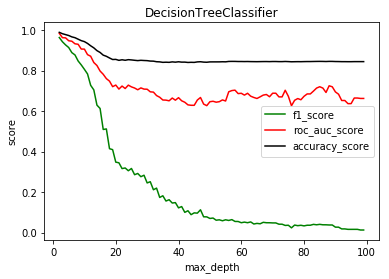

In [67]:
#model = KNeighborsClassifier(n_neighbors=19)
#model = LogisticRegression()

max_c = 0;
max_j = 0;
y_fsc = []
y_rauc = []
y_acc = []
y_ll = []
for j in range(2, 100):
    x_vals = np.arange(2, 100)
    model = KNeighborsClassifier(n_neighbors=j)
    model.fit(X, Y)
    y_pred = model.predict(X_test)
    f_sc = f1_score(y_pred, Y_test)
    y_fsc.append(f_sc)
    r_auc = roc_auc_score(y_pred, Y_test)
    y_rauc.append(r_auc)
    acc = accuracy_score(y_pred, Y_test)
    y_acc.append(acc)
    if f_sc > max_c:
        max_c = f_sc
        max_j = j
print "Max f1_score on max_depth  ",  max_j, " is ", max_c
plt.figure()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('DecisionTreeClassifier')
plt.plot(x_vals, y_fsc, color = "green", label = "f1_score")
plt.plot(x_vals, y_rauc, color = "red", label = "roc_auc_score")
plt.plot(x_vals, y_acc, color = "black", label = "accuracy_score")
plt.legend()

In [68]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(main_table_new[cols], main_table_new[target])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [69]:
y_pred = model.predict(big_test[cols])

In [70]:
dic = {}
for i in range(len(big_test['SK_ID'])):
    dic[np.array(big_test['SK_ID'])[i]] = y_pred[i]

In [71]:
test4_big = pd.read_csv('./dataset/test/subs_csi_test.csv', sep = ';')

In [72]:
res_mas = []
for i in range(len(test4_big['SK_ID'])):
    if np.array(test4_big['SK_ID'])[i] not in dic:
        res_mas.append(0)
    else:
        res_mas.append(dic[np.array(test4_big['SK_ID'])[i]])

In [73]:
len(res_mas)

5221

In [74]:
f = open('RESULT_NEW_2','w')
for i in res_mas:
    f.write(str(i))
    f.write(str('\n'))